In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

raw = pd.read_csv('./data/assignment2data.csv')

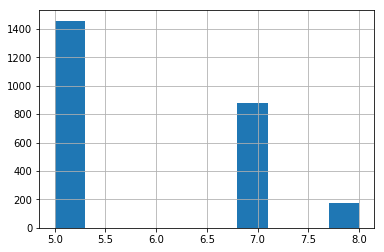

In [13]:
# Plot output values. Since the output qualities
# are either 5, 7 or 8, consider this a three class binary classification problem
raw['quality'].hist(bins=10)

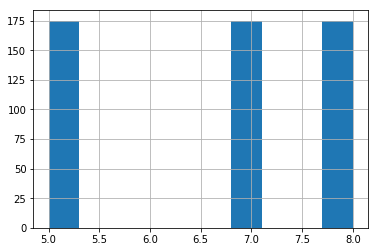

In [14]:
high = raw[raw.quality == 8]
med = raw[raw.quality == 7]
low = raw[raw.quality == 5]

# Get the lowest n per category
nPerCategory = min(len(high), len(med), len(low))

df = pd.concat([
    high.sample(n=nPerCategory),
    med.sample(n=nPerCategory),
    low.sample(n=nPerCategory)
])

df.quality.hist(bins=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.081762,0.202282,0.152503,0.117201,-0.111867,0.090528,0.364674,-0.496673,-0.098629,-0.275834,-0.141349
volatile acidity,-0.081762,1.000000,-0.143476,-0.030168,0.022074,-0.148971,-0.049577,-0.172107,0.011778,-0.091159,0.269516,-0.061073
citric acid,0.202282,-0.143476,1.000000,0.065862,0.165758,0.027833,0.068704,0.148633,-0.087454,0.020109,-0.113040,-0.080673
residual sugar,0.152503,-0.030168,0.065862,1.000000,0.167435,0.218834,0.433028,0.824236,-0.222232,-0.103895,-0.483647,-0.134893
chlorides,0.117201,0.022074,0.165758,0.167435,1.000000,0.029105,0.218830,0.347511,-0.176636,0.003475,-0.405833,-0.297841
free sulfur dioxide,-0.111867,-0.148971,0.027833,0.218834,0.029105,1.000000,0.572370,0.213476,0.056665,0.121786,-0.187877,-0.016822
total sulfur dioxide,0.090528,-0.049577,0.068704,0.433028,0.218830,0.572370,1.000000,0.557405,-0.003482,0.053103,-0.482874,-0.271970
density,0.364674,-0.172107,0.148633,0.824236,0.347511,0.213476,0.557405,1.000000,-0.180303,0.006494,-0.846808,-0.401402
pH,-0.496673,0.011778,-0.087454,-0.222232,-0.176636,0.056665,-0.003482,-0.180303,1.000000,0.249225,0.215767,0.131903
sulphates,-0.098629,-0.091159,0.020109,-0.103895,0.003475,0.121786,0.053103,0.006494,0.249225,1.000000,0.002825,0.051427


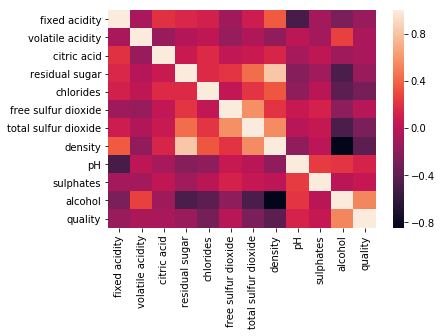

In [15]:
import seaborn as sns

sns.heatmap(df.corr())
df.corr()

,chlorides,total sulfur dioxide,pH,alcohol,quality
chlorides,1.000000,0.218830,-0.176636,-0.405833,-0.297841
total sulfur dioxide,0.218830,1.000000,-0.003482,-0.482874,-0.271970
pH,-0.176636,-0.003482,1.000000,0.215767,0.131903
alcohol,-0.405833,-0.482874,0.215767,1.000000,0.533308
quality,-0.297841,-0.271970,0.131903,0.533308,1.000000


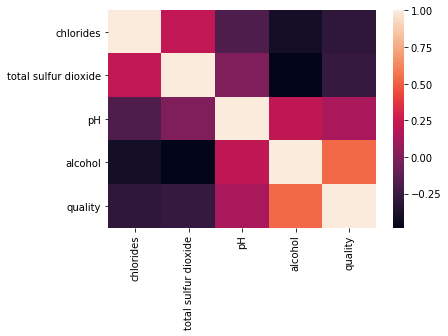

In [27]:
processed = df.drop(
    [
        'density',
        'citric acid',
        'fixed acidity',
        'volatile acidity',
        'sulphates',
        'residual sugar',
        'free sulfur dioxide',
        #'alcohol'
        #'density',
        #'chlorides',
        #'total sulfur dioxide'
    ], 1)

processed = processed.sample(frac=1)

sns.heatmap(processed.corr())
processed.corr()

In [12]:
normed = (processed - processed.min())/(processed.max() - processed.min())
normed.quality = normed.quality * 3 + 5
training = normed[:420]
testing = normed[420:]

normed

,residual sugar,free sulfur dioxide,pH,alcohol,quality
2426,0.278351,0.333333,0.454545,0.578947,7.0
1812,0.180412,0.186275,0.151515,0.807018,8.0
352,0.203608,0.196078,0.595960,0.578947,7.0
640,0.190722,0.274510,0.404040,0.157895,5.0
2289,0.479381,0.588235,0.030303,0.105263,5.0
1229,0.128866,0.117647,0.505051,0.719298,7.0
1919,0.206186,0.196078,0.292929,0.473684,7.0
1249,0.030928,0.421569,0.565657,0.385965,7.0
1358,0.051546,0.352941,0.515152,0.508772,5.0
2504,0.025773,0.411765,0.434343,0.385965,5.0


In [13]:
normed.to_csv("./data/training.csv", index=False)
normed.to_csv("./data/testing.csv", index=False)

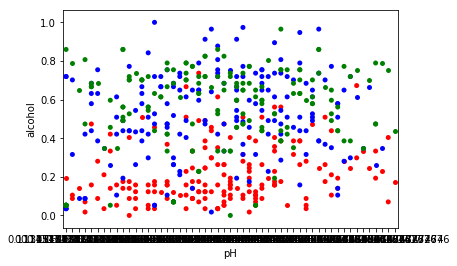

In [14]:
sns.stripplot(x='pH', y='alcohol', data=normed[normed.quality == 5], color='red')
sns.stripplot(x='pH', y='alcohol', data=normed[normed.quality == 7], color='blue')
sns.stripplot(x='pH', y='alcohol', data=normed[normed.quality == 8], color='green')